In [1]:
import os

from PIL import Image
from torchvision import transforms

### Image preprocessing
#### 전처리 로직 (1)
1. 이미지에서 가장 작은 변의 길이로 중심점에서 크롭
2. 224 x 224로 resize
3. tensor 변환
4. normalize

In [18]:
# 이미지 전처리 함수
import torchvision
topilimage = torchvision.transforms.ToPILImage()
save_dir = "/home/yujin/project/notebook/eye_detection/preprocess"

def preprocess_image_test(image_path):
    
    basename = os.path.basename(image_path)
    pil_img = Image.open(image_path).convert("RGB")
    min_size = min(pil_img.size)
    
    transform = transforms.Compose(
        [
            transforms.CenterCrop(min_size),  # 이미지에서 가장 작은 변의 길이로 중심점에서 크롭
            transforms.Resize((224,224)),     # 224 x 224로 resize
            transforms.ToTensor(),
            # transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
        ]
    )

    tensor_img = transform(pil_img)
    pil_img = topilimage(tensor_img)
    pil_img.save(os.path.join(save_dir, basename))



#### 전처리 로직 (2)
- 백내장에 들어간 전처리 로직
1. 224 x 224로 resize
2. 224로 centercrop
3. tensor 변환
4. normalize

In [32]:

def preprocess_image_test2(image_path):
    
    basename = os.path.basename(image_path)
    pil_img = Image.open(image_path).convert("RGB")
    
    transform = transforms.Compose(
        [
            transforms.Resize(224),
            transforms.CenterCrop((224,224)),
            transforms.ToTensor(),
            # transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
        ]
    )

    tensor_img = transform(pil_img)
    pil_img = topilimage(tensor_img)
    pil_img.save(os.path.join(save_dir, basename))


In [33]:

# image_path = ["/home/yujin/project/notebook/eye_detection/testset/0/eye7.jpeg",
#              "/home/yujin/project/notebook/eye_detection/testset/1/image_265.png",
#              "/home/yujin/project/notebook/eye_detection/testset/1/image_296.png"]

# for img_p in image_path :
#     preprocess_image_test(img_p)

#### 이미지 전처리 결과 확인

In [37]:
save_dir = "/home/yujin/project/notebook/eye_detection/etc/preprocess"
os.makedirs(save_dir, exist_ok=True)

In [35]:
from tqdm import tqdm
from concurrent.futures import ThreadPoolExecutor

data_root_list = ["/home/yujin/data/C001/",  "/home/yujin/data/C003/"]
# data_root_list = ["/home/data/data/Cataract-Detection-and-Classification"]

max_threads = 10
total = 0

if not os.path.exists(save_dir):
    os.makedirs(save_dir, exist_ok=True)

for data_root in data_root_list:
    for _dir in os.listdir(data_root):
        if not _dir.startswith("1.complete"):
            cls_dir = os.path.join(data_root, _dir)
            data = os.listdir(cls_dir)[107:120]
            total += len(data)
            
            with ThreadPoolExecutor(max_threads) as executor:
                with tqdm(total=len(data), desc=f"{cls_dir} running") as pbar:
                    futures = [
                        executor.submit(preprocess_image_test2, os.path.join(cls_dir, d))
                        for d in data
                    ] 
                    for future in futures:
                        future.result()
                        pbar.update(1)   

print("total data count:", total)

/home/yujin/data/C001/0 running: 0it [00:00, ?it/s]
/home/yujin/data/C001/1 running: 0it [00:00, ?it/s]
/home/yujin/data/C003/1 running: 100%|██████████| 13/13 [00:00<00:00, 428.73it/s]

total data count: 26


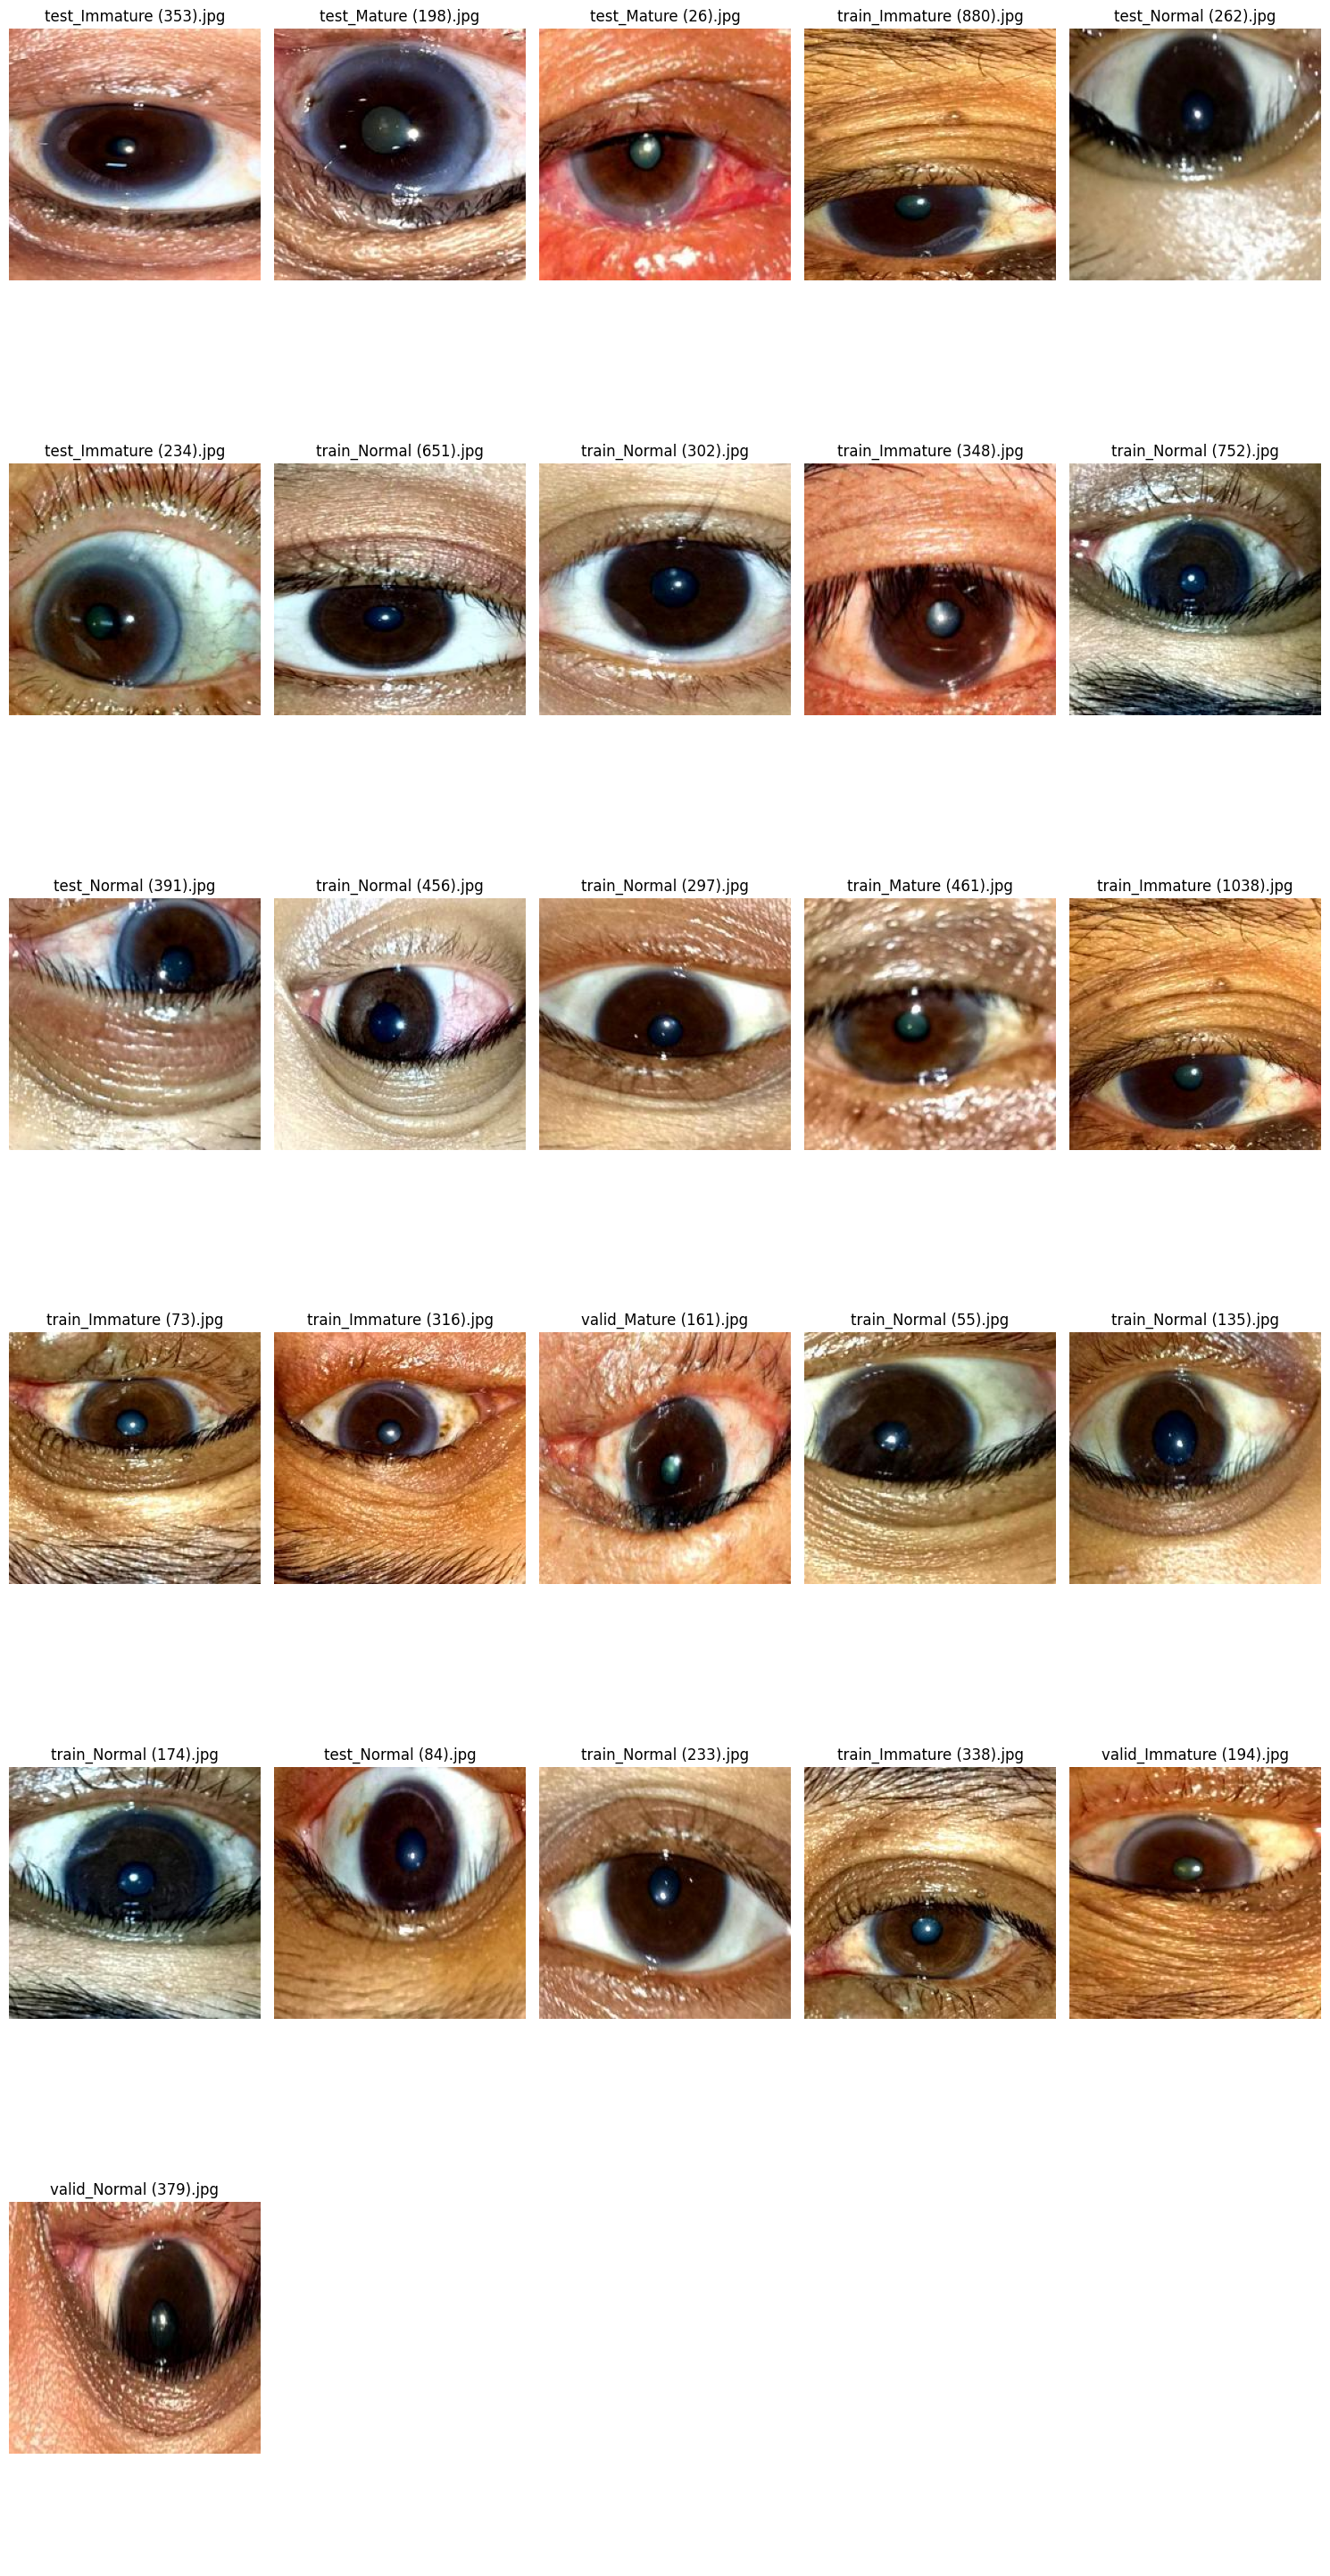

<Figure size 640x480 with 0 Axes>

In [ ]:
import os
import random
import cv2
import matplotlib.pyplot as plt

image_files = os.listdir(save_dir)
 
num_to_display = 30   
sampled_files = random.sample(image_files, min(num_to_display, len(image_files)))   

cols = 5   
rows = (len(sampled_files) // cols) + (len(sampled_files) % cols > 0)  
 
fig, axes = plt.subplots(rows, cols, figsize=(15, 5 * rows))
axes = axes.flatten()   
 
for ax, img_file in zip(axes, sampled_files):
    try:
        img_path = os.path.join(save_dir, img_file)  
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  
        ax.imshow(img)
        ax.axis('off')   
        ax.set_title(img_file)   
    except Exception as e:
        print(f"Error loading image {img_file}: {e}")
        ax.axis('off')   

# 남은 서브플롯 비우기
for i in range(len(sampled_files), len(axes)):
    axes[i].axis('off')

plt.tight_layout()  
plt.show()
